In [1]:
"""
    1. Identify & Drop all the columns with NA % > 50
	2. Identify & drop the columns which have ALL UNIQUE values or ALL SAME.
	3. Check for the correlation between each input & output variable(y).
	4. Check for the distribution of y- identify the outlier values(in a list).
    Check for skewness, if skewed- normalize the column.
    
"""

'\n    1. Identify & Drop all the columns with NA % > 50\n\t2. Identify & drop the columns which have ALL UNIQUE values or ALL SAME.\n\t3. Check for the correlation between each input & output variable(y).\n\t4. Check for the distribution of y- identify the outlier values(in a list).\n    Check for skewness, if skewed- normalize\xa0the\xa0column.\n    \n'

In [2]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
mercedes_df = pd.read_csv('Mercedes.csv')
def columns_wise_null_perc():
    output = {}
    for col in mercedes_df.columns:
        perc = mercedes_df[col].isnull().sum()/mercedes_df.shape[0]
        if perc > 0:
            output[col] = {perc}
    return output
columns_wise_null_perc()

{}

In [4]:
# Find the Unique counts in each columns
unique_columns = list([unique for unique in mercedes_df.columns if len(mercedes_df[unique].unique()) == mercedes_df.shape[0]])

In [5]:
# Find the same values in the columns
same_columns = list([same for same in mercedes_df.columns if len(mercedes_df[same].unique()) == 1])

In [6]:
# Drop the Unique and Same Columns
mercedes_df.drop(columns = unique_columns,inplace = True)
mercedes_df.drop(columns = same_columns,inplace = True)

In [7]:
for col in mercedes_df.columns:
    print(col , ':',mercedes_df[col].dtype)

y : float64
X0 : object
X1 : object
X2 : object
X3 : object
X4 : object
X5 : object
X6 : object
X8 : object
X10 : int64
X12 : int64
X13 : int64
X14 : int64
X15 : int64
X16 : int64
X17 : int64
X18 : int64
X19 : int64
X20 : int64
X21 : int64
X22 : int64
X23 : int64
X24 : int64
X26 : int64
X27 : int64
X28 : int64
X29 : int64
X30 : int64
X31 : int64
X32 : int64
X33 : int64
X34 : int64
X35 : int64
X36 : int64
X37 : int64
X38 : int64
X39 : int64
X40 : int64
X41 : int64
X42 : int64
X43 : int64
X44 : int64
X45 : int64
X46 : int64
X47 : int64
X48 : int64
X49 : int64
X50 : int64
X51 : int64
X52 : int64
X53 : int64
X54 : int64
X55 : int64
X56 : int64
X57 : int64
X58 : int64
X59 : int64
X60 : int64
X61 : int64
X62 : int64
X63 : int64
X64 : int64
X65 : int64
X66 : int64
X67 : int64
X68 : int64
X69 : int64
X70 : int64
X71 : int64
X73 : int64
X74 : int64
X75 : int64
X76 : int64
X77 : int64
X78 : int64
X79 : int64
X80 : int64
X81 : int64
X82 : int64
X83 : int64
X84 : int64
X85 : int64
X86 : int64
X87 

In [8]:
print([i for i in mercedes_df.columns if mercedes_df[i].dtype == 'object'])

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [9]:
non_objects = [i for i in mercedes_df.columns if mercedes_df[i].dtype != 'object']
for i in non_objects:
    if i != 'y':
        mercedes_df[i] = mercedes_df[i].astype('object')
        print(mercedes_df[i].dtype)

object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object

<Axes: >

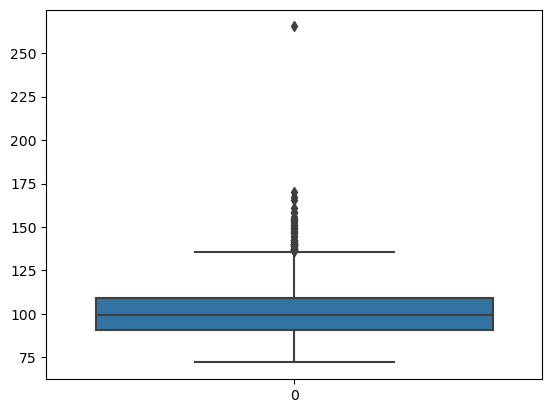

In [10]:
sns.boxplot(mercedes_df['y'])

In [11]:
q3 = mercedes_df['y'].describe()['75%']
q1 = mercedes_df['y'].describe()['25%']
for i in mercedes_df['y']:
    if i >= (q3 + 1.5*(q3-q1)):
        print(i)

139.2
136.41
146.83
150.43
169.91
136.47
154.87
147.72
140.49
265.32
158.53
141.31
140.15
137.44
140.41
144.36
154.43
149.63
160.87
150.89
152.32
139.08
142.71
167.45
139.61
154.16
136.96
140.25
142.71
148.94
136.56
137.49
137.09
158.23
153.51
141.39
144.56
138.19
147.22
139.16
140.31
146.3
165.52
137.32
141.09
139.07
155.62
136.75
142.46
149.52


In [12]:
columns = [column for column in mercedes_df.columns if mercedes_df[column].dtype == 'object']
def Annova(columns):
    output = {}
    for col in columns:
        catagories = list(mercedes_df[col].value_counts().index)
        p_value = f_oneway(*[mercedes_df[mercedes_df[col] == cat]['y'] for cat in catagories])[1]
        if p_value < 0.05:
            output[col] = {'Correlated'}
        else:
            output[col] =  {'Not Correlated'}
    return output 
Annova(columns)

{'X0': {'Correlated'},
 'X1': {'Correlated'},
 'X2': {'Correlated'},
 'X3': {'Correlated'},
 'X4': {'Correlated'},
 'X5': {'Correlated'},
 'X6': {'Correlated'},
 'X8': {'Correlated'},
 'X10': {'Not Correlated'},
 'X12': {'Correlated'},
 'X13': {'Correlated'},
 'X14': {'Correlated'},
 'X15': {'Not Correlated'},
 'X16': {'Correlated'},
 'X17': {'Correlated'},
 'X18': {'Not Correlated'},
 'X19': {'Correlated'},
 'X20': {'Correlated'},
 'X21': {'Correlated'},
 'X22': {'Correlated'},
 'X23': {'Correlated'},
 'X24': {'Not Correlated'},
 'X26': {'Not Correlated'},
 'X27': {'Correlated'},
 'X28': {'Correlated'},
 'X29': {'Correlated'},
 'X30': {'Correlated'},
 'X31': {'Correlated'},
 'X32': {'Not Correlated'},
 'X33': {'Not Correlated'},
 'X34': {'Correlated'},
 'X35': {'Correlated'},
 'X36': {'Not Correlated'},
 'X37': {'Correlated'},
 'X38': {'Not Correlated'},
 'X39': {'Not Correlated'},
 'X40': {'Not Correlated'},
 'X41': {'Not Correlated'},
 'X42': {'Not Correlated'},
 'X43': {'Correlated

C:\Users\pbandi\AppData\Local\Temp\ipykernel_21528\972873716.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mercedes_df['y'])


<Axes: xlabel='y', ylabel='Density'>

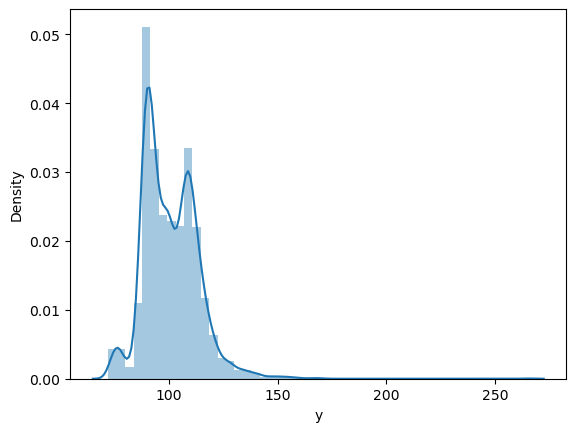

In [13]:
# Check for skewness, if skewed- normalize the column.
sns.distplot(mercedes_df['y'])

In [14]:
mercedes_df['y'] = np.log(mercedes_df['y'])

C:\Users\pbandi\AppData\Local\Temp\ipykernel_21528\905570552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mercedes_df


<Axes: xlabel='y', ylabel='Density'>

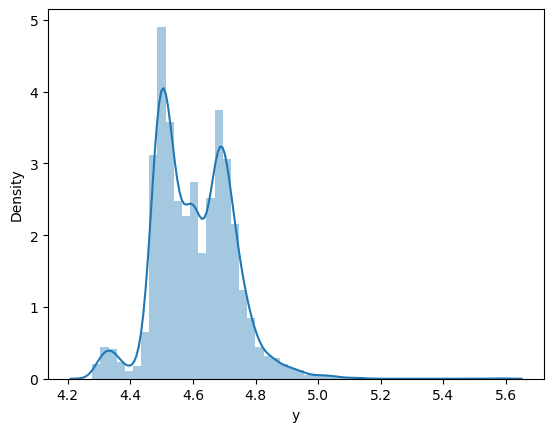

In [15]:
sns.distplot(mercedes_df
           ['y'])

In [16]:
mercedes_df['y'].describe()

count    4209.000000
mean        4.604311
std         0.121663
min         4.278193
25%         4.508880
50%         4.596634
75%         4.691440
max         5.580937
Name: y, dtype: float64